In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

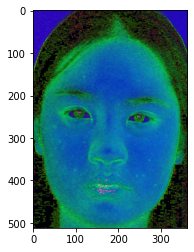

In [3]:
image1 = cv2.imread('./dataset/test/01.bmp')
image1_lab = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB)
image1_lab_denoised = cv2.fastNlMeansDenoisingColored(image1_lab, None, 10, 10, 7, 21)
image1_hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
plt.imshow(image1_hsv, cmap='hsv')

In [4]:
image2 = cv2.imread('./dataset/test/02.bmp')
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
image2_lab = cv2.cvtColor(image2, cv2.COLOR_BGR2LAB)
image2_lab_denoised = cv2.fastNlMeansDenoisingColored(image2_lab, None, 10, 10, 7, 21)
image2_hsv_denoised = cv2.fastNlMeansDenoisingColored(image2_hsv, None, 10, 10, 7, 21)

In [5]:
image5 = cv2.imread('./dataset/test/05.bmp')
image5_hsv = cv2.cvtColor(image5, cv2.COLOR_BGR2HSV)
image5_lab = cv2.cvtColor(image5, cv2.COLOR_BGR2LAB)
image5_lab_denoised = cv2.fastNlMeansDenoisingColored(image5_lab, None, 10, 10, 7, 21)
image5_hsv_denoised = cv2.fastNlMeansDenoisingColored(image5_hsv, None, 10, 10, 7, 21)

In [6]:
image10 = cv2.imread('./dataset/test/10.bmp')
image10_hsv = cv2.cvtColor(image10, cv2.COLOR_BGR2HSV)
image10_hsv_denoised = cv2.fastNlMeansDenoisingColored(image10_hsv, None, 10, 10, 7, 21)

In [7]:
image20 = cv2.imread('./dataset/test/20.bmp')
image20_hsv = cv2.cvtColor(image20, cv2.COLOR_BGR2HSV)
image20_hsv_denoised = cv2.fastNlMeansDenoisingColored(image20_hsv, None, 10, 10, 7, 21)

In [8]:
image46 = cv2.imread('./dataset/test/46.bmp')
image46_hsv = cv2.cvtColor(image46, cv2.COLOR_BGR2HSV)
image46_hsv_denoised = cv2.fastNlMeansDenoisingColored(image46_hsv, None, 10, 10, 7, 21)

In [9]:
image6 = cv2.imread('./dataset/test/06.bmp')
image6_hsv = cv2.cvtColor(image6, cv2.COLOR_BGR2HSV)
image6_hsv_denoised = cv2.fastNlMeansDenoisingColored(image6_hsv, None, 10, 10, 7, 21)

In [10]:
image7 = cv2.imread('./dataset/test/07.bmp')
image7_hsv = cv2.cvtColor(image7, cv2.COLOR_BGR2HSV)
image7_hsv_denoised = cv2.fastNlMeansDenoisingColored(image7_hsv, None, 10, 10, 7, 21)

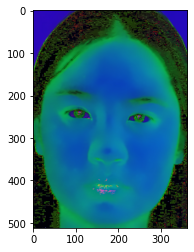

In [11]:
# denoising
image1_hsv_denoised = cv2.fastNlMeansDenoisingColored(image1_hsv, None, 10, 10, 7, 21)
plt.imshow(image1_hsv_denoised, cmap='hsv')

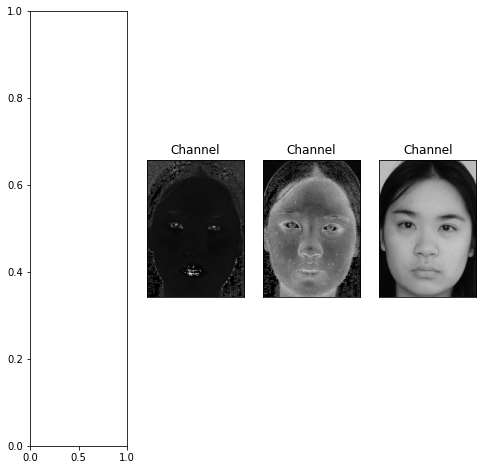

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 4, 1)
for i in range(3):
    plt.subplot(1, 4, i+2)
    plt.imshow(image1_hsv[:, :, i], cmap='gray')
    plt.title('Channel'), plt.xticks([]), plt.yticks([])
plt.show()

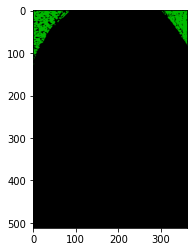

In [13]:
# take out background only
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

lower_bg = np.array([20, 5, 175])
upper_bg = np.array([60, 15, 200])
background_mask = cv2.inRange(image1_hsv, lower_bg, upper_bg)
background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, kernel)
img_background = cv2.bitwise_and(image1, (0, 255, 0), mask=background_mask)
plt.imshow(img_background, cmap='gray')

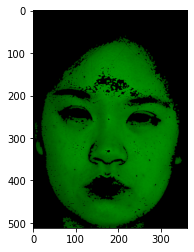

In [14]:
# take out skin only
lower_skin = np.array([5, 70, 90])
upper_skin = np.array([15, 155, 200])
skin_mask = cv2.inRange(image1_hsv, lower_skin, upper_skin)
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_ELLIPSE, kernel)
img_skin = cv2.bitwise_and(image1, (0, 255, 0), mask=skin_mask)
plt.imshow(img_skin, cmap='gray')

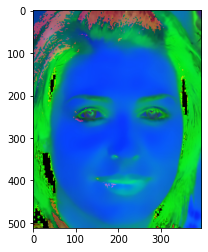

In [15]:
plt.imshow(image10_hsv_denoised, cmap='hsv')

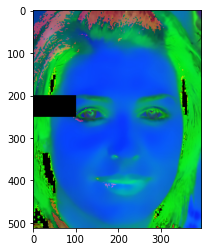

In [16]:
plt.imshow(cv2.rectangle(image10_hsv_denoised, (0, 200), (100, 250), (0, 0, 0), -1))

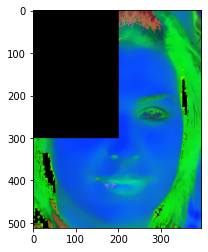

In [17]:
plt.imshow(cv2.rectangle(image10_hsv_denoised, (0, 0), (200, 300), (0, 0, 0), -1))

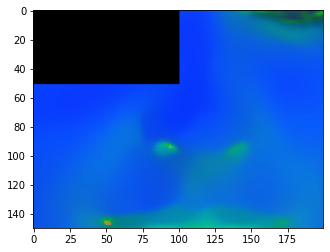

In [18]:
nose_only = image10_hsv_denoised[250:400, 100:300]
plt.imshow(nose_only, cmap='gray')

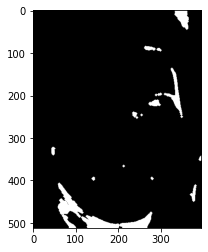

In [19]:
# nose
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
lower_nose = np.array([10, 90, 130])
upper_nose = np.array([12, 155, 185])
nose_mask = cv2.inRange(image10_hsv_denoised, lower_nose, upper_nose)
nose_mask = cv2.morphologyEx(nose_mask, cv2.MORPH_OPEN, kernel)
nose_mask = cv2.dilate(nose_mask, kernel, iterations=2)
img_nose = cv2.bitwise_and(image10_hsv_denoised, (0, 255, 0), mask=nose_mask)
plt.imshow(nose_mask, cmap='gray')

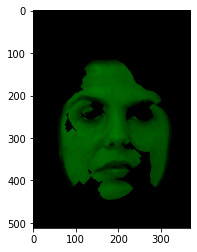

In [20]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
mask1 = cv2.inRange(image20_hsv_denoised, lower_skin, upper_skin)
mask_skin = cv2.erode(mask1, kernel1, iterations=1)
mask_skin = cv2.dilate(mask_skin, kernel1, iterations=10)
img_skin = cv2.bitwise_and(image20, (0, 255, 0), mask=mask_skin)
plt.imshow(img_skin, cmap='gray')

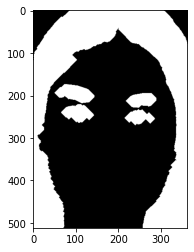

In [21]:
# hair mask
lower_hair = np.array([0, 0, 6])
upper_hair = np.array([120, 120, 100])
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
mask = cv2.inRange(image1_hsv_denoised, lower_hair, upper_hair)
hair_mask = cv2.erode(mask, kernel, iterations=1)
hair_mask = cv2.dilate(hair_mask, kernel, iterations=11)
plt.imshow(hair_mask, cmap='gray')

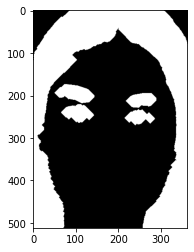

In [22]:
# hair mask
lower_hair = np.array([0, 0, 6])
upper_hair = np.array([120, 120, 100])
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
mask = cv2.inRange(image1_hsv_denoised, lower_hair, upper_hair)
hair_mask = cv2.erode(mask, kernel, iterations=1)
hair_mask = cv2.dilate(hair_mask, kernel, iterations=11)
plt.imshow(hair_mask, cmap='gray')

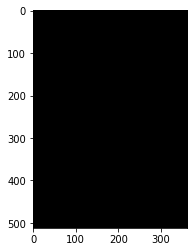

In [23]:
# mouth mask
# mouth_lower = np.array([65, 147, 135])
# mouth_upper = np.array([130, 170, 152])
mouth_lower = np.array([70, 170, 150])
mouth_upper = np.array([130, 180, 170])
# mouth_lower = np.array([65, 147, 135])
# mouth_upper = np.array([130, 170, 152])
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
mask = cv2.inRange(image1_lab_denoised, mouth_lower, mouth_upper)
mask_erode = cv2.erode(mask, kernel, iterations=2)
mask_dilate = cv2.dilate(mask_erode, kernel, iterations=5)
plt.imshow(mask_dilate, cmap='gray')

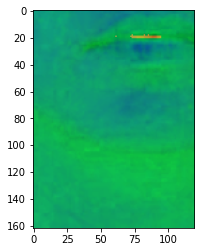

In [24]:
# crop out mouth
mouth_only = image20_hsv[350:, 110:230]
plt.imshow(mouth_only, cmap='gray')

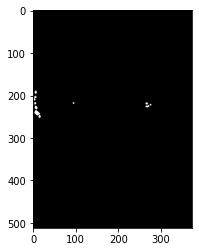

In [25]:
# take out eyes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
lower_eye = np.array([0, 0, 0])
upper_eye = np.array([80, 80, 80])
mask = cv2.inRange(image5_hsv_denoised, lower_eye, upper_eye)
mask_erode = cv2.erode(mask, kernel, iterations=1)
mask_dilate = cv2.dilate(mask_erode, kernel, iterations=2)
plt.imshow(mask_dilate, cmap='gray')

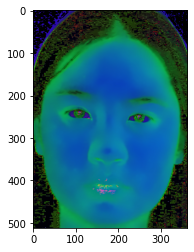

In [26]:
img_hsv_final = image1_hsv_denoised.copy()
img_hsv_final[np.where(background_mask)] = 0
plt.imshow(img_hsv_final, cmap='gray')

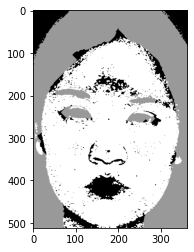

In [27]:
img_hsv_final = image1_hsv_denoised.copy()
img_res = cv2.bitwise_or(img_hsv_final, 0, mask=hair_mask)
img_res1 = cv2.bitwise_or(img_hsv_final, (50, 50, 50), mask=background_mask)
img_res2 = cv2.bitwise_or(img_hsv_final, (255, 0, 0), mask=skin_mask)
res = img_res + img_res1 + img_res2
res1 = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
res1 = cv2.cvtColor(res1, cv2.COLOR_RGB2GRAY)
res1[np.where(hair_mask)] = [3]
res1[np.where(background_mask)] = [0]
res1[np.where(skin_mask)] = [5]
plt.imshow(res1, cmap='gray')

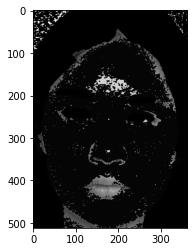

In [28]:
img_hsv_final = image1_hsv.copy()
img_hsv_final[np.where(hair_mask)] = [1]
img_hsv_final[np.where(background_mask)] = [0]
img_hsv_final[np.where(skin_mask)] = [5]
plt.imshow(cv2.cvtColor(cv2.cvtColor(img_hsv_final, cv2.COLOR_HSV2RGB), cv2.COLOR_RGB2GRAY), cmap='gray')

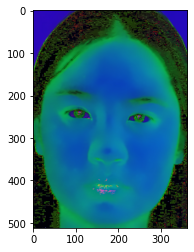

In [29]:
plt.imshow(image1_hsv_denoised)

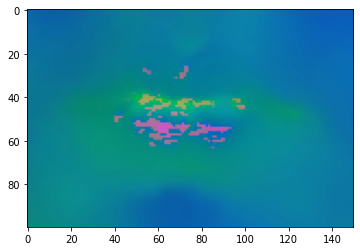

In [30]:
plt.imshow(image1_hsv_denoised[370: 470, 100: 250])

In [31]:
image1_hsv_denoised.shape

(512, 363, 3)

In [32]:
image10_lab = cv2.cvtColor(image10, cv2.COLOR_BGR2LAB)
image10_lab_denoised = cv2.fastNlMeansDenoisingColored(image10_lab, None, 10, 10, 7, 21)

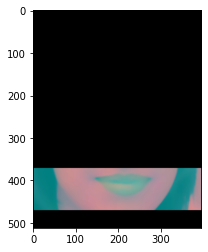

In [33]:
copy = image10_lab_denoised.copy()
plt.imshow(cv2.rectangle(copy, (0, 0), (copy.shape[1], 370), (0, 0, 0), -1))
plt.imshow(cv2.rectangle(copy, (0, 470), (copy.shape[1], copy.shape[0]), (0, 0, 0), -1))

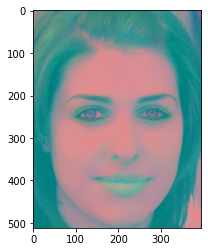

In [34]:
copy = image10_lab.copy()
plt.imshow(copy)

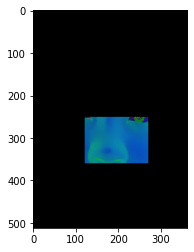

In [133]:
copy = image1_hsv_denoised.copy()
cv2.rectangle(copy, (0, 0), (copy.shape[1], 250), (0, 0, 0), -1)
cv2.rectangle(copy, (0, 360), (copy.shape[1], copy.shape[0]), (0, 0, 0), -1)
cv2.rectangle(copy, (0, 250), (120, 360), (0, 0, 0), -1)
# cv2.rectangle(copy, (0, 250), (100, 380), (0, 0, 0), -1)
plt.imshow(cv2.rectangle(copy, (270, 250), (copy.shape[1], 360), (0, 0, 0), -1))

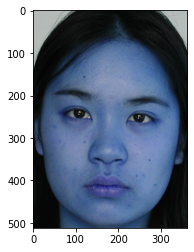

In [36]:
#    cv2.rectangle(nose_region, (0, 0), (nose_region.shape[1], 250), (0, 0, 0), -1)
#    cv2.rectangle(nose_region, (0, 380), (nose_region.shape[1], nose_region.shape[0]), (0, 0, 0), -1)
#    cv2.rectangle(nose_region, (0, 250), (120, 380), (0, 0, 0), -1)
#    cv2.rectangle(nose_region, (250, 250), (nose_region.shape[1], 380), (0, 0, 0), -1)
plt.imshow(image1)

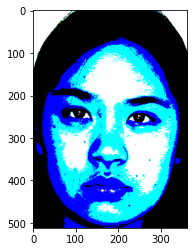

In [37]:
# cv2 threshold
ret, thesh = cv2.threshold(image1, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thesh, cmap='gray')

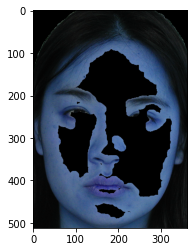

In [38]:
background_lower = np.array([100, 100, 100])
background_upper = np.array([255, 255, 255])

thresh = cv2.inRange(image1, background_lower, background_upper)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask = 255 - morph
result = cv2.bitwise_and(image1, image1, mask=mask)

plt.imshow(result, cmap='gray')

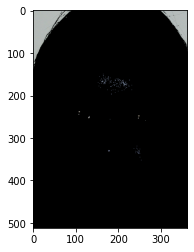

In [39]:
img_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret, mask_bg = cv2.threshold(img_gray, 165, 255, cv2.THRESH_BINARY)
img_res = cv2.bitwise_or(image1, 0, mask=mask_bg)
plt.imshow(img_res, cmap='gray')

In [40]:
   # background_lower = np.array([20, 5, 175])
   # background_upper = np.array([60, 15, 200])
   # background_mask = cv2.inRange(img_hsv_denoised, background_lower, background_upper)
   # background_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
   # background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, background_kernel)

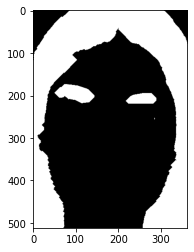

In [93]:
copy = hair_mask.copy()
blocked_eyes = cv2.rectangle(copy, (65, 220), (copy.shape[1] - 80, 300), (0, 0, 0), -1)
plt.imshow(blocked_eyes, cmap='gray')

In [77]:
# blocked_eyes = cv2.cvtColor(cv2.cvtColor(blocked_eyes, cv2.COLOR_HSV2RGB), cv2.COLOR_RGB2GRAY)
# blocked_eyes.shape

In [78]:
hair_mask - blocked_eyes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

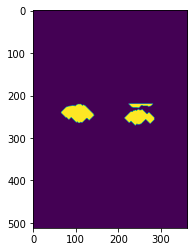

In [95]:
plt.imshow(hair_mask - blocked_eyes)

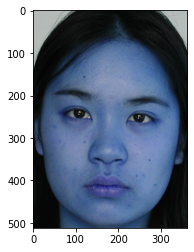

In [96]:
# felzenszwalb segmentation
from skimage.segmentation import felzenszwalb
plt.imshow(image1)

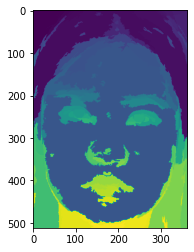

In [108]:
plt.imshow(felzenszwalb(image1, scale=100, sigma=0.5, min_size=50))

In [125]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
(T, threshInv) = cv2.threshold(image1_gray, 180, 255,
	cv2.THRESH_BINARY + cv2.THRESH_BINARY_INV)

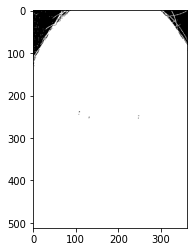

In [126]:
plt.imshow(threshInv, cmap='gray')